In [1]:
import numpy as numpy
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"//home/poggerez/codebase/python/stock-analysis/sensex-01041979-31122023d.csv").drop("Unnamed: 5", axis=1) \
        .assign(Date = lambda k: pd.to_datetime(k.Date).dt.strftime("%Y-%m-%d")).rename_axis("data-point") \
        .rename({"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close"}, axis=1)

In [3]:
year_plot = ("2023", "2022", "2021", "2020")
window = len(year_plot) * 10 + 1
df["peak_local"] = df["close"].rolling(window, center=True, closed="both", min_periods=1).max().eq(df["close"])
df["trough_local"] = df["close"].rolling(window, center=True, closed="both", min_periods=1).min().eq(df["close"])
df

,date,open,high,low,close,peak_local,trough_local
data-point,,,,,,,
0,1979-04-03,NaN,NaN,NaN,124.15,False,False
1,1979-04-04,NaN,NaN,NaN,122.85,False,True
2,1979-04-06,NaN,NaN,NaN,123.52,False,False
3,1979-04-07,NaN,NaN,NaN,124.18,False,False
4,1979-04-09,NaN,NaN,NaN,124.30,False,False
...,...,...,...,...,...,...,...
10373,2023-12-22,71045.65,71259.55,70713.56,71106.96,False,False
10374,2023-12-26,71097.78,71471.29,71012.08,71336.80,False,False
10375,2023-12-27,71492.02,72119.85,71473.65,72038.43,False,False


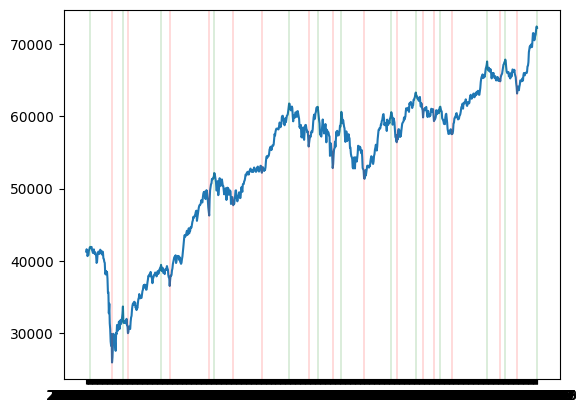

In [4]:
df_plot = df.query("date.str.startswith(@year_plot)")
plt.plot(df_plot["date"], df_plot["close"])
for peak in df_plot.query("peak_local == True")["date"]: plt.axvline(peak, linewidth=0.2, color="g")
for peak in df_plot.query("trough_local == True")["date"]: plt.axvline(peak, linewidth=0.2, color="r")
plt.show()